# HW2 Problem 2 by Anthony Hevia


## Loading the MNIST fashion data set

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# Used Wocjan's notebooks and models as a starting point

#Goodfit Model

In [2]:
# Added dropout to reduce overfitting
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 131us/sample - loss: 0.7527 - acc: 0.7232 - val_loss: 0.5161 - val_acc: 0.8068
Epoch 2/30
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5439 - acc: 0.8054 - val_loss: 0.4542 - val_acc: 0.8328
Epoch 3/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4962 - acc: 0.8227 - val_loss: 0.4311 - val_acc: 0.8436
Epoch 4/30
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4745 - acc: 0.8307 - val_loss: 0.4099 - val_acc: 0.8531
Epoch 5/30
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4597 - acc: 0.8349 - val_loss: 0.4032 - val_acc: 0.8530
Epoch 6/30
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4438 - acc: 0.8401 - val_loss: 0.3922 - val_acc: 0.8601
Epoch 7/30
60000/60000 [=====

## Evaluate accuracy

In [3]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.3517 - acc: 0.8741
Test accuracy: 0.8741


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

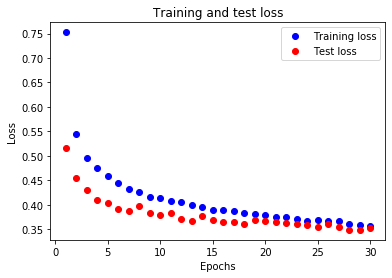

In [5]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

## Training and test accurarcy

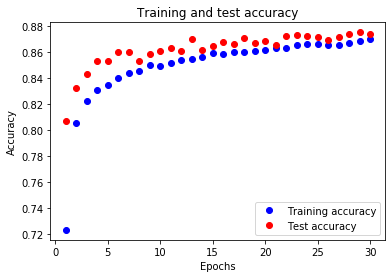

In [7]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit Model



In [8]:
# set up the layers
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 30
history_overfit = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4803 - acc: 0.8285 - val_loss: 0.4287 - val_acc: 0.8445
Epoch 2/30
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3655 - acc: 0.8664 - val_loss: 0.3835 - val_acc: 0.8598
Epoch 3/30
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3301 - acc: 0.8780 - val_loss: 0.3654 - val_acc: 0.8740
Epoch 4/30
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3095 - acc: 0.8851 - val_loss: 0.3573 - val_acc: 0.8706
Epoch 5/30
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2927 - acc: 0.8916 - val_loss: 0.3447 - val_acc: 0.8779
Epoch 6/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2765 - acc: 0.8964 - val_loss: 0.3522 - val_acc: 0.8735
Epoch 7/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2636 - acc: 0.9010 - val_l

## Evaluate accuracy

In [9]:
test_loss_overfit, test_acc_overfit = model_overfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_overfit)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.4485 - acc: 0.8881
Test accuracy: 0.8881


## Training/test loss/accuracy during training

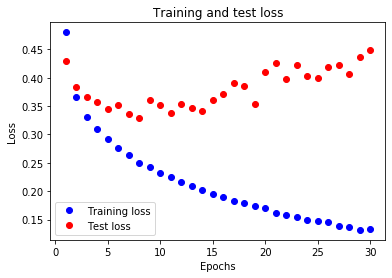

In [10]:
history_dict_overfit = history_overfit.history
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training and test accuracy

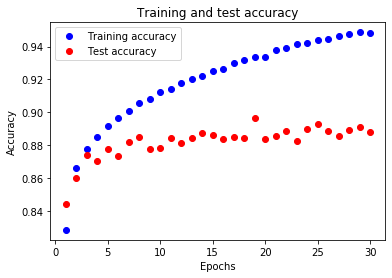

In [11]:
acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
plt.plot(epochs_range, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Underfit Model

In [12]:
# set up the layers

model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history_underfit = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 1.4410 - acc: 0.4555 - val_loss: 0.8557 - val_acc: 0.7192
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 1.2558 - acc: 0.5091 - val_loss: 0.7924 - val_acc: 0.7315
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 1.2311 - acc: 0.5159 - val_loss: 0.7842 - val_acc: 0.7320
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 1.2091 - acc: 0.5281 - val_loss: 0.7649 - val_acc: 0.7355
Epoch 5/10
60000/60000 [==============================] - 7s 110us/sample - loss: 1.1980 - acc: 0.5330 - val_loss: 0.7511 - val_acc: 0.7351
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 1.1933 - acc: 0.5346 - val_loss: 0.7410 - val_acc: 0.7371
Epoch 7/10
60000/60000 [==============================] - 7s 109us/sample - loss: 1.1943 - acc: 0.5326 - val_l

## Evaluate accuracy

In [13]:
test_loss_underfit, test_acc_underfit = model_underfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_underfit)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.7523 - acc: 0.7375
Test accuracy: 0.7375


## Training/test loss/accuracy during training

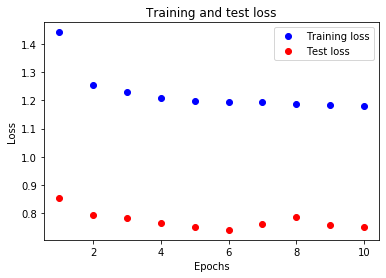

In [14]:
history_dict_underfit = history_underfit.history
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training and test accuracy

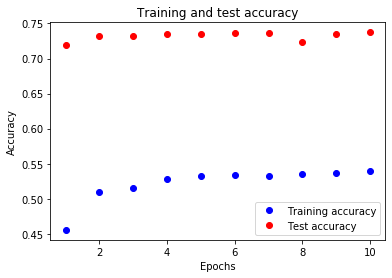

In [15]:
acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
plt.plot(epochs_range, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()